## 소상공인시장진흥공단 Sbiz - 지역별 경영현황 데이터  크롤링
- https://sg.sbiz.or.kr/godo/index.sg
- **주간인구수**: 시군구 단위의 주간인구통계 (단위:천명) /\
  **밀집도**: 인구 천명당 사업체수 /\
  **밀집도_중위값**: 세세분류 단위에서 밀집도 중위값 /\
  **밀집정도**: 밀집도 - 밀집도_중위값 (0 이상인 경우 " 고"로, 미안인 경우 " 저"로 구분) /\
  **동종근로자_임금_수준미만**: 연간 영업이익 대비 동종입금근로자 임금 수준미만인 업종 비중 /\
  **동종근로자_임금_수준미만_척도**: 4점 척도로 연간 영업이익 대비 등종업종근로자 임금 수준이 미만인 사업체 비중을 세세분류 수준에서, \
  사업체 중 차지하는 비중이 75 % 이상 " 매우 높음"\
  사업체 중 차지하는 비중이 50 ~ 7496 " 높음"\
  사업체 중 차지하는 비중이 25 ~ 4996 " 보통"\
  사업체 중 차지하는 비중이 25 % 이하 " 낮음"으로 평가
  
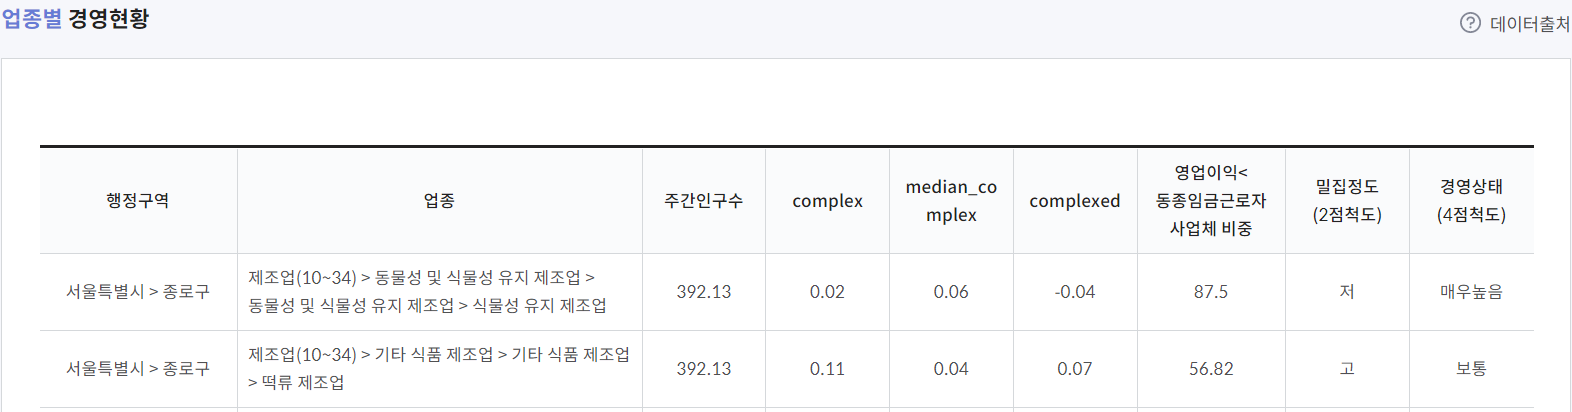

### 1) 크롤링 코드

In [2]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import warnings
warnings.filterwarnings('ignore')

In [29]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.implicitly_wait(10)
time.sleep(0.5)
s_data, 행정구역, 행정구역, 업종, 주간인구수, 밀집도, 밀집도_중위값, 밀집정도, 동종근로자_임금_수준미만, 동종근로자_임금_수준미만_척도 = [],[],[],[],[],[],[],[],[],[] 

driver.get('https://sg.sbiz.or.kr/godo/stat/updens.sg')
for region in range(17,18):
    for industry in range(2,23):
        driver.implicitly_wait(10)
        time.sleep(1)
        try :
            driver.find_element(By.XPATH,'//*[@id="page4-1"]/div[1]/div/div[1]/ul/li[1]/div').click()
        except :
            time.sleep(2)
            driver.find_element(By.XPATH,'//*[@id="page4-1"]/div[1]/div/div[1]/ul/li[1]/div').click()
        driver.implicitly_wait(10)
        time.sleep(1)
        for i in range(1, region+1):
            driver.find_element(By.XPATH,f'//*[@id="megaUl"]/li[{i+1}]/label').click()
            driver.implicitly_wait(10)
            time.sleep(0.5)
            if i % 5 == 0 :
                driver.find_element(By.TAG_NAME, 'html').send_keys(Keys.ARROW_DOWN)
                driver.implicitly_wait(10)
                time.sleep(1)
        driver.implicitly_wait(10)
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="ctyUl"]/li[1]/label').click()
        driver.implicitly_wait(10)
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="popupbox"]/div/div[2]/div/div[2]/a[2]').click()  
        driver.implicitly_wait(10)
        time.sleep(1)
        driver.find_element(By.XPATH,'//*[@id="page4-1"]/div[1]/div/div[1]/ul/li[2]/div').click()
        driver.implicitly_wait(10)
        time.sleep(1)
        for nm in range(1, industry+1):
            driver.implicitly_wait(10)
            time.sleep(1)
            driver.find_element(By.XPATH,f'//*[@id="upjong1Ul"]/li[{nm}]/label').click()
            driver.implicitly_wait(10)
            time.sleep(1)
            if nm % 3 == 0 :
                driver.find_element(By.TAG_NAME, 'html').send_keys(Keys.ARROW_DOWN)
                driver.implicitly_wait(10)
                time.sleep(1)
            if nm % 15 == 0 :
                driver.find_element(By.TAG_NAME, 'html').send_keys(Keys.ARROW_DOWN)
                driver.implicitly_wait(10)
                time.sleep(1)
        driver.implicitly_wait(10)
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="upjong2Ul"]/li[1]/label').click()
        driver.implicitly_wait(10)
        time.sleep(2)
        try :
            driver.find_element(By.XPATH, '//*[@id="popupbox"]/div/div[2]/div/div[2]/a[2]').click()
        except:
            time.sleep(1)
            driver.find_element(By.XPATH, '//*[@id="popupbox"]/div/div[2]/div/div[2]/a[2]').click()
        driver.implicitly_wait(10)
        time.sleep(2)
        driver.find_element(By.XPATH, '//*[@id="page4-1"]/div[1]/div/div[2]/a').click()
        driver.implicitly_wait(10)
        time.sleep(2)
        page_source = driver.page_source
        soup = bs(page_source, 'lxml')
        try:
            soup.select('#updensTable tr')[1]
        except: pass
        else:
            table = soup.select('#updensTable td')
            for i in range(len(table)//9):
                행정구역 = [table[9*i].text]
                업종 = [table[9*i+1].text]
                주간인구수 = [table[9*i+2].text]
                밀집도 = [table[9*i+3].text]
                밀집도_중위값 = [table[9*i+4].text]
                밀집정도 = [table[9*i+5].text]
                동종근로자_임금_수준미만 = [table[9*i+6].text]
                동종근로자_임금_수준미만_척도 = [table[9*i+7].text]
                s_data.append([행정구역, 업종, 주간인구수, 밀집도, 밀집도_중위값, 밀집정도, 동종근로자_임금_수준미만, 동종근로자_임금_수준미만_척도])
                s_data = sum(s_data,[])
driver.quit()

17번쨰 완료


### 2) 데이터 저장 : sbiz_df.csv

In [31]:
sbiz_df = pd.DataFrame(s_data, columns=['행정구역', '업종', '주간인구수', '밀집도', '밀집도_중위값', '밀집정도', '동종근로자_임금_수준미만', '동종근로자_임금_수준미만_척도'])
sbiz_df.to_csv('sbiz_df.csv') 
sbiz_df.head(10)

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,서울특별시 > 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저
1,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고
2,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저
3,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저
4,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저
5,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 건강 보조용 액화...,392.13,0.04,0.04,-0.01,80.00,저
6,서울특별시 > 종로구,제조업(10~34) > 방적 및 가공사 제조업 > 방적 및 가공사 제조업 > 연사 ...,392.13,0.01,0.03,-0.02,66.67,저
7,서울특별시 > 종로구,제조업(10~34) > 직물 직조 및 직물제품 제조업 > 직물 직조 및 직물제품 제...,392.13,0.02,0.03,-0.01,42.86,저
8,서울특별시 > 종로구,제조업(10~34) > 직물 직조 및 직물제품 제조업 > 직물 직조 및 직물제품 제...,392.13,0.02,0.03,0.00,55.56,저
9,서울특별시 > 종로구,제조업(10~34) > 직물 직조 및 직물제품 제조업 > 직물 직조 및 직물제품 제...,392.13,0.01,0.03,-0.01,60.00,저


### 3) 결측치 확인

In [34]:
sbiz_df.isnull().sum()

행정구역                0
업종                  0
주간인구수               0
밀집도                 0
밀집도_중위값             0
밀집정도                0
동종근로자_임금_수준미만       0
동종근로자_임금_수준미만_척도    0
dtype: int64

### 4) 데이터 탐색 (TBU)

In [38]:
sbiz_df['행정구역'].value_counts()

인천광역시 > 서구     534
인천광역시 > 남동구    521
대구광역시 > 북구     512
인천광역시 > 부평구    487
대구광역시 > 달서구    484
              ... 
전라남도 > 신안군     117
경상북도 > 영양군     116
경상남도 > 산청군     107
경상남도 > 의령군     106
경상북도 > 울릉군      88
Name: 행정구역, Length: 252, dtype: int64

In [41]:
sbiz_df['행정구역'].unique()

array(['서울특별시 > 종로구', '서울특별시 > 중구', '서울특별시 > 용산구', '서울특별시 > 성동구',
       '서울특별시 > 광진구', '서울특별시 > 동대문구', '서울특별시 > 중랑구', '서울특별시 > 성북구',
       '서울특별시 > 강북구', '서울특별시 > 도봉구', '서울특별시 > 노원구', '서울특별시 > 은평구',
       '서울특별시 > 서대문구', '서울특별시 > 마포구', '서울특별시 > 양천구', '서울특별시 > 강서구',
       '서울특별시 > 구로구', '서울특별시 > 금천구', '서울특별시 > 영등포구', '서울특별시 > 동작구',
       '서울특별시 > 관악구', '서울특별시 > 서초구', '서울특별시 > 강남구', '서울특별시 > 송파구',
       '서울특별시 > 강동구', '충청북도 > 청주시흥덕구', '충청북도 > 옥천군', '충청북도 > 충주시',
       '충청북도 > 제천시', '충청북도 > 청주시상당구', '충청북도 > 청주시서원구', '충청북도 > 청주시청원구',
       '충청북도 > 보은군', '충청북도 > 영동군', '충청북도 > 진천군', '충청북도 > 괴산군',
       '충청북도 > 음성군', '충청북도 > 단양군', '충청북도 > 증평군', '충청남도 > 천안시동남구',
       '충청남도 > 천안시서북구', '충청남도 > 공주시', '충청남도 > 보령시', '충청남도 > 아산시',
       '충청남도 > 서산시', '충청남도 > 논산시', '충청남도 > 계룡시', '충청남도 > 당진시',
       '충청남도 > 금산군', '충청남도 > 부여군', '충청남도 > 서천군', '충청남도 > 청양군',
       '충청남도 > 홍성군', '충청남도 > 예산군', '충청남도 > 태안군', '전라북도 > 전주시완산구',
       '전라북도 > 전주시덕진구', '전라북도 > 군산시', '전라북도 > 익산시', '전라북도 > 정읍시',
    